# Part II - Difference of Bike Trips during Weekdays and Weekends in San Francisco
## by Caio Priszculnik


## Investigation Overview
On this presentation I'm going to focus on the difference of start time for trips during weekdays and weekends. And I'll also explore the difference of average trip duration between weekdays and weekends. This is an interesting pattern that suggests that on weekdays most trips are for commuting and on weekends they are for leisure.

## Dataset Overview

The data consisted of 183,412 rides in a bike-sharing program in San Francisco during the month of February 2019. The dataset includes 16 features about the trips:duration in seconds, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, member birth year, member gender and bike share for all trip.
8,265 rows were removed because the had no values for the member's birth year and member's gender were Null, therefore, there are 175,147 trips in the dataset used in the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('bike_df_final.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trips During the Day

The distribution of trips for start hour during the day has a bimodal distribution, with two peaks at the morning (8h-10h) and evening(16h-18h) rush hours.

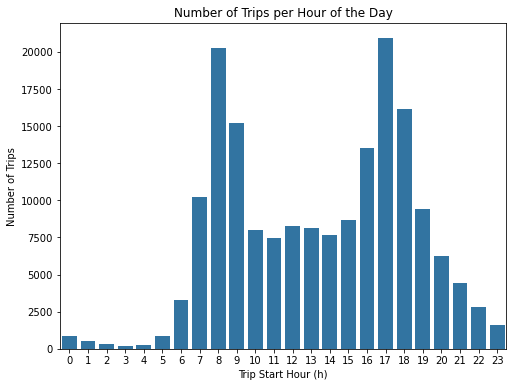

In [3]:
# Plot the distribution of trips per hour of the day
base_color = sns.color_palette()[0]
plt.figure(figsize=[8, 6])
sns.countplot(data=bike_df, x='start_hour', color=base_color)
plt.title('Number of Trips per Hour of the Day')
plt.xlabel('Trip Start Hour (h)')
plt.ylabel('Number of Trips');

## Distribution of Trips During the Day by Day of the Week

When we explore the distribution of trips during the day by day of the week we can see that the bimodal distribution of trips during the rush hour happens only during weekdays. During weekends, most trips happen during the afternoon (13h-17h) and we don't have a bimodal distribution.

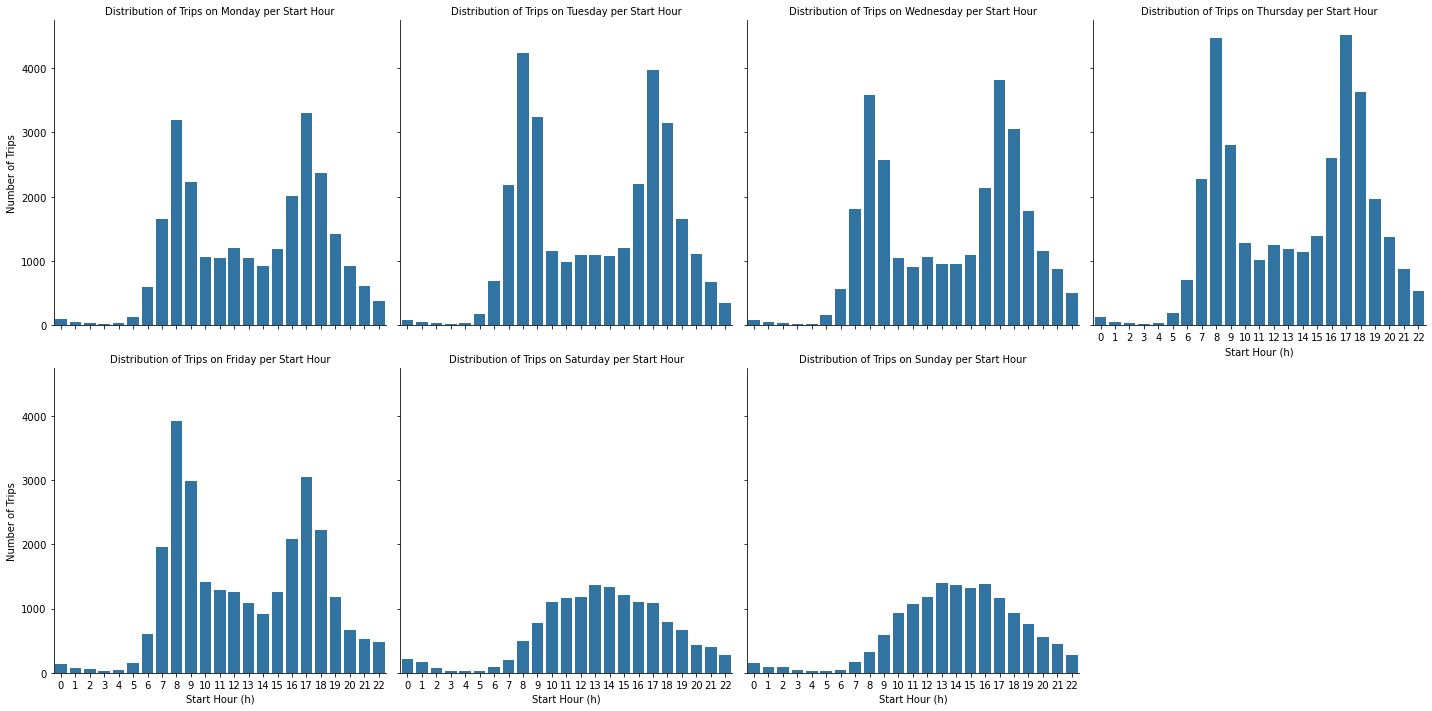

In [4]:
# Plot the number of trips for each day of the week and start hour
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # Define the day of week order
g = sns.FacetGrid(data=bike_df, col='start_day_of_week', height=5, col_wrap=4, col_order=day_order)
g.map(sns.countplot, 'start_hour', order=np.arange(0, 23, 1))
g.set_titles('Distribution of Trips on {col_name} per Start Hour')
g.set_axis_labels('Start Hour (h)', 'Number of Trips');

## Average Trip Duration by Day of the Week

Exploring the average trip duration for day of the week we can see that the average trip duration is longer during the weekends than on weekdays. One possible explanation for this result with the distribution of trips from the previous slides is that on weekdays the bike-sharing program is used for commuting (shorter trips and during rush hours), while during the weekend the program is used for leisure (longer trips during the afternoon).

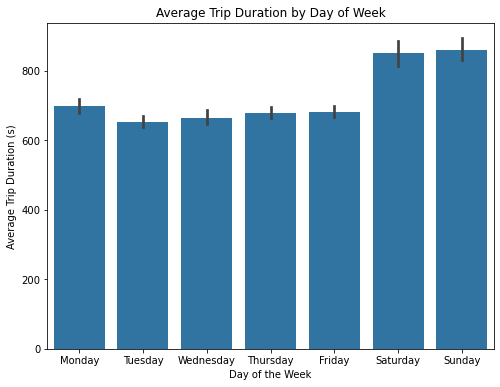

In [5]:
# Plot average duration by day of week
plt.figure(figsize=[8, 6])
sns.barplot(data=bike_df, x='start_day_of_week', y='duration_sec', color=base_color, order=day_order)
plt.ylabel('Average Trip Duration (s)')
plt.xlabel('Day of the Week')
plt.title('Average Trip Duration by Day of Week');

## Average Trip Duration by Day of the Week and User Type

Looking at the average trip duration for user type and day of the week we can see that Customers have longer trips on all days and their trips are longer on weekends. This result supports the explanation that most people use the bike sharing trips for leisure during weeekends.

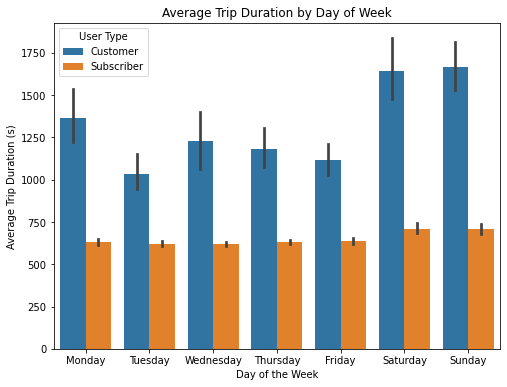

In [6]:
# Plot the average trip duration by day of week and user type
plt.figure(figsize=[8, 6])
sns.barplot(data=bike_df, x='start_day_of_week', y='duration_sec', order=day_order, hue='user_type')
plt.ylabel('Average Trip Duration (s)')
plt.xlabel('Day of the Week')
plt.title('Average Trip Duration by Day of Week')
plt.legend(title='User Type');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [7]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 675855 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
^C

Interrupted


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 